Improved Accuracy: 84.60%

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.88      0.77      0.82      2696
    Negative       0.88      0.87      0.88      4380
     Neutral       0.86      0.82      0.84      3605
    Positive       0.79      0.89      0.84      4119

    accuracy                           0.85     14800
   macro avg       0.85      0.84      0.84     14800
weighted avg       0.85      0.85      0.85     14800



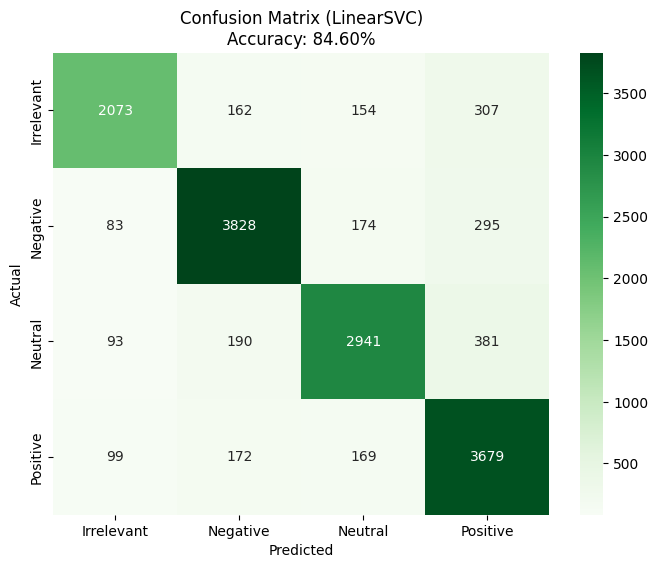

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv('/content/twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# 2. Cleaning
df.dropna(subset=['Text'], inplace=True)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text) # Keep only alpha-numeric
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

# 3. Advanced Feature Extraction
# ngram_range=(1, 2): Uses both single words and 2-word phrases
# max_features=20000: Increases vocabulary size for better detail
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['Cleaned_Text'])
y = df['Sentiment']

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train LinearSVC Model
# LinearSVC is faster and often more accurate for text than Logistic Regression
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Improved Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix (LinearSVC)\nAccuracy: {accuracy:.2%}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-3537439061.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Text_Length', data=df, palette='viridis')


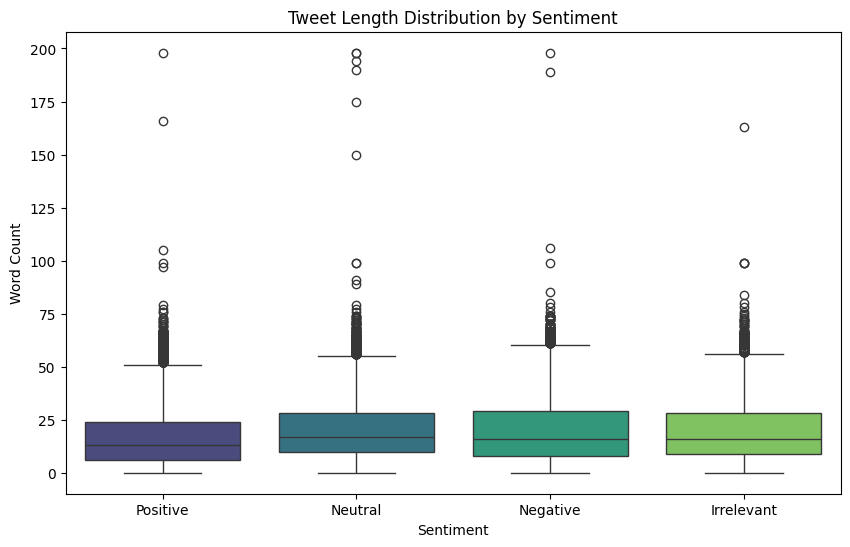

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of words per tweet
df['Text_Length'] = df['Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=df, palette='viridis')
plt.title('Tweet Length Distribution by Sentiment')
plt.ylabel('Word Count')
plt.show()

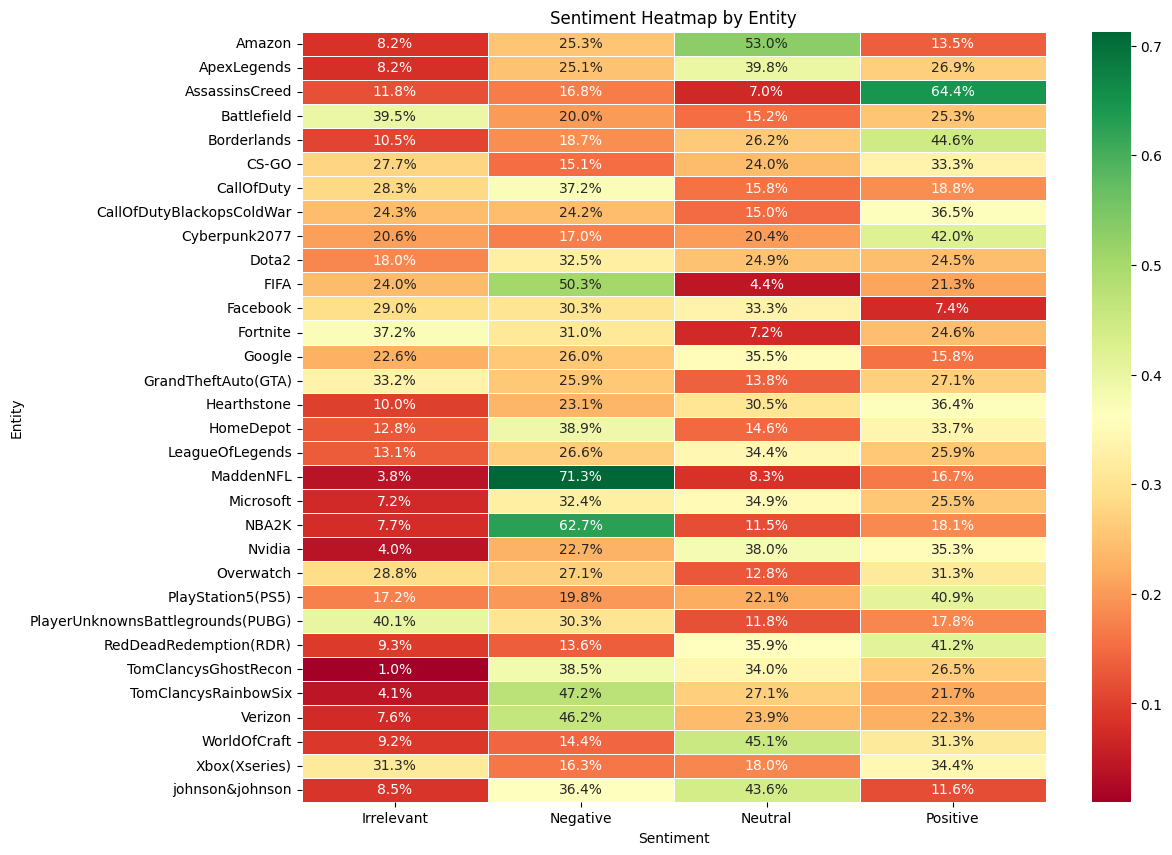

In [5]:
# Create a crosstab normalized by index (rows) to get percentages
entity_sentiment = pd.crosstab(df['Entity'], df['Sentiment'], normalize='index')

plt.figure(figsize=(12, 10))
sns.heatmap(entity_sentiment, annot=True, fmt='.1%', cmap='RdYlGn', linewidths=.5)
plt.title('Sentiment Heatmap by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

/tmp/ipython-input-4081329011.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg.values, y=top_neg.index, ax=axes[0], palette='Reds_r')
/tmp/ipython-input-4081329011.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos.values, y=top_pos.index, ax=axes[1], palette='Greens_r')


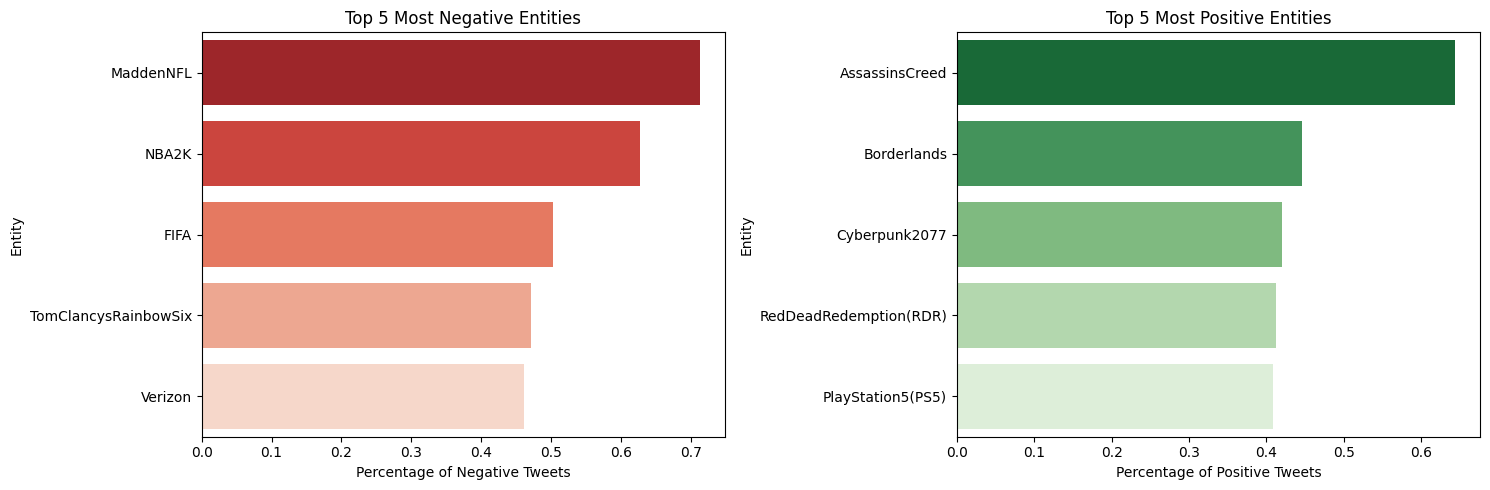

In [6]:
# Calculate sentiment percentages per entity
sentiment_counts = pd.crosstab(df['Entity'], df['Sentiment'], normalize='index')

# Get Top 5 Highest Positive and Top 5 Highest Negative
top_pos = sentiment_counts['Positive'].sort_values(ascending=False).head(5)
top_neg = sentiment_counts['Negative'].sort_values(ascending=False).head(5)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Negative
sns.barplot(x=top_neg.values, y=top_neg.index, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 5 Most Negative Entities')
axes[0].set_xlabel('Percentage of Negative Tweets')

# Plot Positive
sns.barplot(x=top_pos.values, y=top_pos.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 5 Most Positive Entities')
axes[1].set_xlabel('Percentage of Positive Tweets')

plt.tight_layout()
plt.show()